# Aprendizaje supervisado
## Regresión

La idea general de la regresión es predecir una variable continua, todo lo contrario de la clasificación donde se buscaba predecir una variable nominal (clase).

En el siguiente ejemplo se usa la función seno para crear un dataset con el que se trabajará de manera introductoria.

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
x = np.linspace(-3, 3, 100)
print(x.shape)

(100,)


In [4]:
rng = np.random.RandomState(34)
y = np.sin(4 * x) + x + rng.uniform(size=len(x))

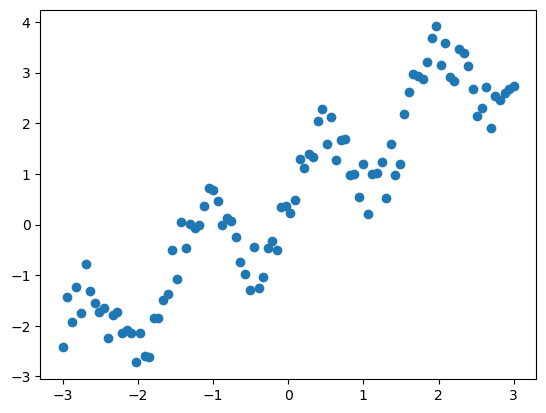

In [5]:
plt.plot(x, y, 'o');

## Regresión Lineal

**Regresión Lineal Simple:** Los datos  predecir estan en una línea recta. El modelo de scikit-learn a usar será **LinearRegression** ([Ordinary Least Squaare - OLS](https://es.wikipedia.org/wiki/M%C3%ADnimos_cuadrados_ordinarios)). La forma de trabajar este estimador es similar a como se trabajo con los calsificadores anteriores, con la diferencia que **y** es un array de valores reales en lugar de valores categoricos.

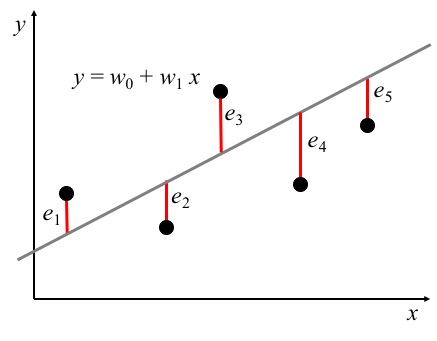

Scikit-learn espera que los valores de **y** se incresen como un array de 1 dimension mientras que para **X** se espera un array de dos dimensiones. En el dataset que se diseño solo se cuenta con una características, por lo tanto, se debe convertir a un array de Numpy de una dimensión.

In [6]:
print(x.shape)

(100,)


In [7]:
X = x[:, np.newaxis]

In [8]:
print(X.shape)

(100, 1)


Se divide el dataset en **Train** y **Test** - 75% para entrenamiento y 25% para test.

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=34)

Se usa el estimador de regresión lineal **LinearRegresion** para ajustar el modelo a los datos de entrenamiento.

In [10]:
from sklearn.linear_model import LinearRegression

# n_jobsint, default=None
# The number of jobs to use for the computation. 
# This will only provide speedup in case of sufficiently large problems,
# that is if firstly n_targets > 1 and secondly X is sparse or if positive is set to True.
# None means 1 unless in a joblib.parallel_backend context. -1 means using all processors.

estimador = LinearRegression(n_jobs=2)
estimador.fit(X_train, y_train)

LinearRegression(n_jobs=2)

Observar los parámetros obtenidos:

In [11]:
print(f"Pesos: {estimador.coef_}")
print(f"Ordenada en el origen: {estimador.intercept_}")

Pesos: [0.93006866]
Ordenada en el origen: 0.5464594838132846


El modelo de regresión lineal con **y** como la variable objetivo y **x** como la independiente es:

$$
y = peso \times x + \text{ordenadaOrigen}
$$

Al graficar el modelo con los valores máximo y mínimo y con la ordenada sus pesos queda:

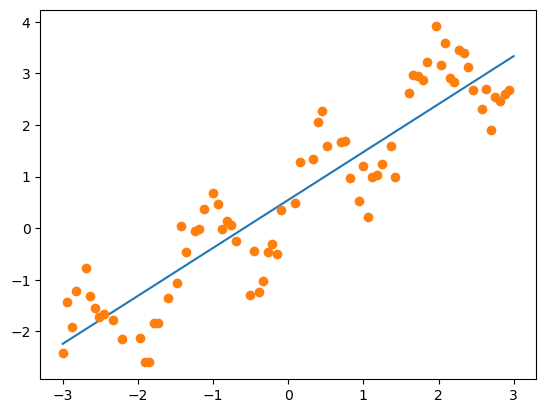

In [12]:
min = X.min() * estimador.coef_[0] + estimador.intercept_
max = X.max() * estimador.coef_[0] + estimador.intercept_

plt.plot([X.min(), X.max()], [min, max])
plt.plot(X_train, y_train, 'o');

Al igual que con los estimadores de clasificación, se usa el método **predict** para estimar los valores de la variable objetivo con nuevos valores de X.

In [13]:
y_predict_train = estimador.predict(X_train)

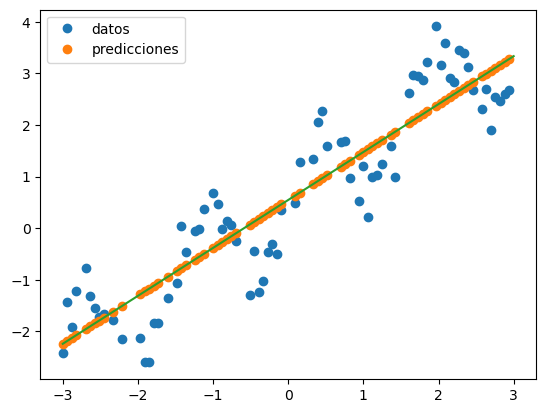

In [14]:
plt.plot(X_train, y_train, 'o', label="datos")
plt.plot(X_train, y_predict_train, 'o', label="predicciones")
plt.plot([X.min(), X.max()], [min, max])
plt.legend(loc='best');

In [15]:
y_predict_test = estimador.predict(X_test)

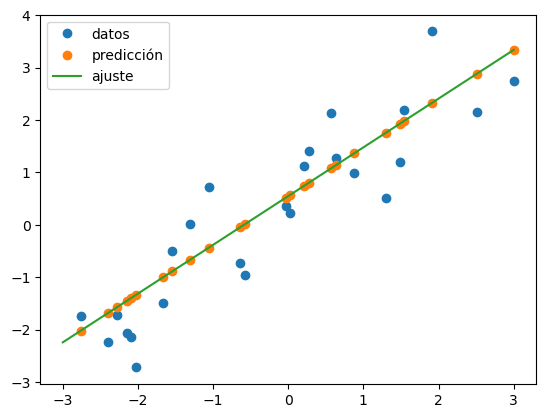

In [16]:
plt.plot(X_test, y_test, 'o', label="datos")
plt.plot(X_test, y_predict_test, 'o', label="predicción")
plt.plot([X.min(), X.max()], [min, max], label='ajuste')
plt.legend(loc='best');

Scikit-learn proporciona un método fácil para evaluar cuantitativamente los estimadores de regresión a través de la función score. Para tareas de regresión, este sería por defecto el **R2**. Otra forma popular de evaluación sería el **Mean Squared Error (MSE)**. Como indica su nombre, el MSE consiste simplemente en la diferencia al cuadrado promediada entre los valores predichos y los valores reales:

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (\text{predicted}_i - \text{true}_i)^2
$$

In [17]:
estimador.score(X_test, y_test)

0.8145825664777111

In [18]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_predict_test))

0.546499247487709


<div class="alert alert-info">
    <b>EJERCICIO</b>
    Añade una característica que consista en <b>sin(4x)</b> a la matriz <b>X</b> y vuelve a ajustar el modelo. Visualiza las predicciones con este modelo más complejo, aunque aún lineal.
</div>

## KNeighborsRegression

Existe un método de vecinos para la regresión. Este predice directamente el valor de la variable objetivo del punto más cercano, o del promedio de los **n** puntos más cercanos. Los métodos de vecinos son mas populares en clasificación que en regresión.

In [19]:
from sklearn.neighbors import KNeighborsRegressor

estimador_kn = KNeighborsRegressor(n_neighbors=1)
estimador_kn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

Verificamos el comportamiento del model en Train y Test:

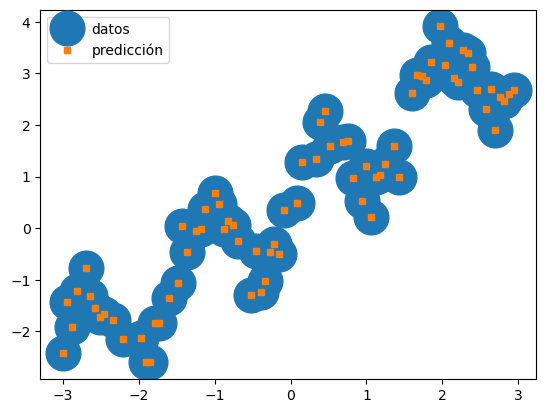

In [20]:
y_predict_train = estimador_kn.predict(X_train)

plt.plot(X_train, y_train, 'o', label="datos", markersize=25)
plt.plot(X_train, y_predict_train, 's', label="predicción", markersize=4)
plt.legend(loc='best');

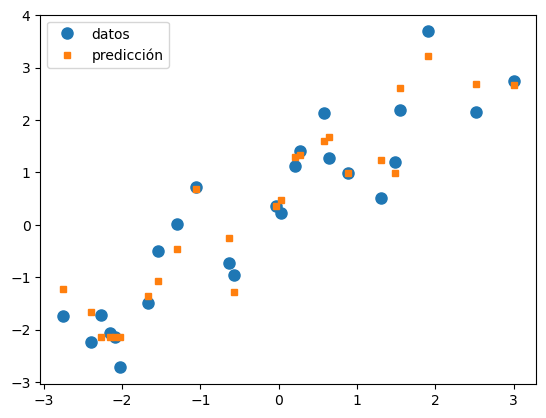

In [21]:
y_predict_test = estimador_kn.predict(X_test)

plt.plot(X_test, y_test, 'o', label="datos", markersize=8)
plt.plot(X_test, y_predict_test, 's', label="predicción", markersize=4)
plt.legend(loc='best');

Este modelo predice mejor que el modelo lineal. Observemos el **score**:

In [22]:
estimador_kn.score(X_test, y_test)

0.9478459362359973

In [23]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_predict_test))

0.15371886051387523


El modelo lineal no se ajusta adecuadamente al problema, ya que no tenía la suficiente complejidad e infra-entrenaba los datos (error alto por sesgo).

[GradientBoostingRegressor](https://towardsdatascience.com/all-you-need-to-know-about-gradient-boosting-algorithm-part-1-regression-2520a34a502)

In [69]:
from sklearn.ensemble import GradientBoostingRegressor

lr = GradientBoostingRegressor(random_state=0, n_estimators=60, 
    learning_rate=0.1, 
    max_depth=1)

lr.fit(X_train, y_train)

y_predict_test = lr.predict(X_test)

0.9129542688940836
0.2565585427579677


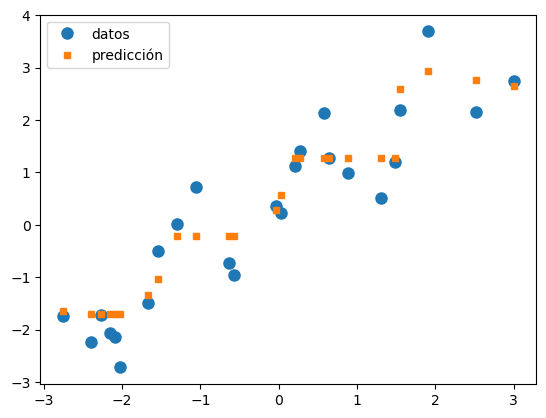

In [68]:
from sklearn.metrics import mean_squared_error

print(lr.score(X_test, y_test))
print(mean_squared_error(y_test, y_predict_test))

plt.plot(X_test, y_test, 'o', label="datos", markersize=8)
plt.plot(X_test, y_predict_test, 's', label="predicción", markersize=4)
plt.legend(loc='best');

<div class="alert alert-info">
    <b>EJECICIO</b>
    Construir un modelo de regresión con LinearRegression y KNNeighborsRegressor usando el dataset Boston Housing. <b>sklearn.datasets.fetch_california_housing</b>.
</div>

In [59]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [66]:
housing.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000